In [102]:
import numpy as np
import pandas as pd

In [103]:
data = pd.read_csv('Cleaned.csv', index_col=0)

In [104]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Feature Engineering

In [105]:
for cols in data.columns:
    print(data[f'{cols}'].dtype)

int64
int64
int64
int64
float64
float64
float64
float64
float64
int64
float64
float64
float64


In [ ]:
for col in data.columns:
    if data[f'{col}'].dtype == 'int64':
        data = data.drop(columns=col)

In [106]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [107]:
data.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:

def standardize(df):
    df = df.copy()  

    for col in df.columns:
        if col != 'area' and pd.api.types.is_numeric_dtype(df[col]):  
            mean = df[col].mean()
            std = df[col].std()
            if std != 0:  
                df[col] = (df[col] - mean) / std
            else:
                df[col] = 0 

    return df

In [111]:
data = standardize(data)

In [112]:
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,51,1.497164,-0.073197,0.00
1,7,4,10,3,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,33,-1.740070,-0.073197,0.00
2,7,4,10,7,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,33,-1.516813,-0.073197,0.00
3,8,6,3,6,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,97,-0.009824,0.602572,0.00
4,8,6,3,8,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,99,-1.237741,-0.073197,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,8,-1.638496,-0.845829,0.474309,-1.561947,1.534597,32,-0.735411,-0.073197,6.44
513,2,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.518517,71,0.994835,-0.073197,54.29
514,7,4,8,8,-1.638496,-0.845829,0.474309,-1.561947,0.397965,70,1.497164,-0.073197,11.16
515,1,4,8,7,0.680298,0.548471,0.269122,0.499693,1.155720,42,-0.009824,-0.073197,0.00


## Model

In [113]:
class LinearRegression:
    def __init__(self):
        self.weight = None
    
    def fit(self, X, y):
        first = np.dot(X.T, X)
        invert_mat = np.linalg.inv(first)
        self.weight = (invert_mat @ X.T) @ y 

    def delta(self, y, y_hat):
        return y - y_hat
    
    def rmse(self, y, y_hat):
        return np.sqrt(np.mean(self.delta(y, y_hat) ** 2))
    
    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.weight)

In [114]:
X_train, X_test  = np.split(data, [int(0.8 * len(data))])

c:\Users\ply58\anaconda3\envs\machinelearning\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [115]:
y_train = X_train['area']
y_test = X_test['area']
X_train = X_train.drop(columns='area')
X_test = X_test.drop(columns='area')

## Training

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [117]:
for w in lr.weight:
    print(f"{w:.20f}")

1.05408204809394057122
-0.56674950588499695137
1.80617331061249708490
1.66674622404571093348
0.12340534264916883100
6.79152692130859847452
-3.73414938966360177020
-4.27974274957848610512
1.18405202341682502798
-0.28845408429856628230
0.32808460272990513928
-2.89114783087284443752


In [118]:
print(f"{lr.rmse(y_test, predictions):.20f}")

79.87684399244710675703


## Comparison

#### Đây là kết quả rmse của bài 1:


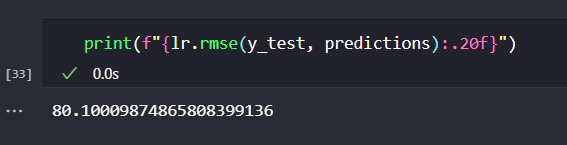



#### Có thể thấy rằng sau khi chuẩn hóa dữ liệu về dạng Standard Normal Distribution thì khi tính Root Mean Square Error (RMSE) sẽ nhỏ hơn một xíu so với RMSE của dữ liệu trước khi chuẩn hóa.